<a href="https://www.kaggle.com/code/yashvardhanthakker/olympics-analysis?scriptVersionId=193877527" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paris-2024-olympic-summer-games/nocs.csv
/kaggle/input/paris-2024-olympic-summer-games/coaches.csv
/kaggle/input/paris-2024-olympic-summer-games/medallists.csv
/kaggle/input/paris-2024-olympic-summer-games/technical_officials.csv
/kaggle/input/paris-2024-olympic-summer-games/teams.csv
/kaggle/input/paris-2024-olympic-summer-games/torch_route.csv
/kaggle/input/paris-2024-olympic-summer-games/schedules.csv
/kaggle/input/paris-2024-olympic-summer-games/athletes.csv
/kaggle/input/paris-2024-olympic-summer-games/venues.csv
/kaggle/input/paris-2024-olympic-summer-games/schedules_preliminary.csv
/kaggle/input/paris-2024-olympic-summer-games/medals_total.csv
/kaggle/input/paris-2024-olympic-summer-games/events.csv
/kaggle/input/paris-2024-olympic-summer-games/medals.csv
/kaggle/input/paris-2024-olympic-summer-games/results/Rowing.csv
/kaggle/input/paris-2024-olympic-summer-games/results/Table Tennis.csv
/kaggle/input/paris-2024-olympic-summer-games/results/Water Polo.csv
/kaggle/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('/kaggle/input/paris-2024-olympic-summer-games/athletes.csv')
data.head(10)

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN
5,1532951,ARENAS Lorena,ARENAS L,Lorena ARENAS,Female,Athlete,COL,Colombia,Colombia,Colombia,...,"Father, Jose Otoniel. Mother, Maria Rudy. Has ...",Spanish,Personal: Brent Vallance (AUS),NaN,"Race walker Luis Fernando Lopez (COL), four-ti...",NaN,NaN,NaN,In competition she wears a ring or earrings he...,NaN
6,1533112,McKENZIE Ashley,McKENZIE A,Ashley McKENZIE,Male,Athlete,JAM,Jamaica,Jamaica,Jamaica,...,"One daughter, Lana-Rose, who lives in France",English,Personal and National: Luke Preston (GBR),"""I was thrown over [an argument about] a Pokem...","Boxer Muhammad Ali, born Cassius Clay (USA), f...","""My coach Luke Preston. We've been a team for ...",NaN,NaN,NaN,NaN
7,1533136,BASS BITTAYE Gina Mariam,BASS BITTAYE GM,Gina Mariam BASS BITTAYE,Female,Athlete,GAM,Gambia,Gambia,Gambia,...,"Husband, Mustapha Bittaye - physical education...","English, French",Personal: Christophe Belliard (FRA),“I started running when I was in primary schoo...,"Sprinter Shelly-Ann Fraser-Pryce (JAM), three ...",NaN,"""If you believe in yourself, never be discoura...",NaN,NaN,NaN
8,1533176,CAMARA Ebrahima,CAMARA E,Ebrahima CAMARA,Male,Athlete,GAM,Gambia,Gambia,Gambia,...,Married. One daughter. Has three brothers,"Arabic, English, French, Mandinka, Wolof",Personal: Christophe Belliard (FRA),"""I love running and I was fast a child."" (Athl...","Sprinter Gina Mariam Bass Bittaye (GAM), two-t...","Momodou Lamin Kujabi, a former international a...","""What does not kill you makes you stronger."" (...",NaN,NaN,NaN
9,1533188,RUEDA SANTOS Lizeth,RUEDA SANTOS L,Lizeth RUEDA SANTOS,Female,Athlete,MEX,Mexico,Mexico,Mexico,...,NaN,Spanish,Personal: Eugenio Chimal (MEX),Was a competitive swimmer from age 12 and went...,NaN,NaN,NaN,NaN,NaN,Competed in marathon swimming at London 2012. ...


In [4]:
data.shape

(11110, 35)

In [5]:
data.columns

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_long', 'nationality',
       'nationality_full', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports'],
      dtype='object')

In [6]:
data.isnull().sum()

code                      0
name                      0
name_short                0
name_tv                   0
gender                    0
function                  0
country_code              0
country                   0
country_long              0
nationality               3
nationality_full          3
nationality_code          3
height                    0
weight                    2
disciplines               0
events                    0
birth_date                0
birth_place            2383
birth_country          1635
residence_place        4306
residence_country      2822
nickname               8144
hobbies                6903
occupation             1526
education              5572
family                 5549
lang                    505
coach                  2888
reason                 5264
hero                   7795
influence              8955
philosophy             8327
sporting_relatives     8592
ritual                10253
other_sports          10050
dtype: int64

In [7]:
# Dropping the columns which we will not be using for the EDA
col = ['birth_place',
       'residence_place', 'nickname', 'hobbies', 'nationality',
       'occupation', 'education', 'family', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual', 'coach', 'reason',
       'other_sports', 'residence_country', 'lang']
data = data.drop(col, axis = 1)
data.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,birth_country
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia


In [8]:
data[data['country'] != data['birth_country']]

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,birth_country
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,NaN
6,1533112,McKENZIE Ashley,McKENZIE A,Ashley McKENZIE,Male,Athlete,JAM,Jamaica,Jamaica,Jamaica,JAM,0,0.0,['Judo'],['Men -60 kg'],1989-07-17,Great Britain
12,1533208,MAAROUFOU Hachim,MAAROUFOU H,Hachim MAAROUFOU,Male,Athlete,COM,Comoros,Comoros,Comoros,COM,183,0.0,['Athletics'],"[""Men's 100m""]",1997-02-13,France
13,1533209,SAADI Maesha,SAADI M,Maesha SAADI,Female,Athlete,COM,Comoros,Comoros,Comoros,COM,0,0.0,['Swimming'],"[""Women's 50m Freestyle""]",2007-01-16,France
17,1533234,ALFEREZ Regina,ALFEREZ R,Regina ALFEREZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,MEX,0,0.0,['Artistic Swimming'],['Team'],1997-12-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,4979557,WHITTAKER Isabella,WHITTAKER I,Isabella WHITTAKER,Female,Athlete,USA,United States,United States of America,United States of America,USA,167,0.0,['Athletics'],['4 x 400m Relay Mixed'],2002-02-15,NaN
11103,4979790,INSIXIENGMAY Steven,INSIXIENGMAY S,Steven INSIXIENGMAY,Male,Athlete,LAO,Lao PDR,Lao People's Democratic Republic,Lao People's Democratic Republic,LAO,0,0.0,['Swimming'],"[""Men's 100m Breaststroke""]",2004-01-21,NaN
11104,4980004,van de WIEL Anne,van de WIEL A,Anne van de WIEL,Female,Athlete,NED,Netherlands,Netherlands,Netherlands,NED,168,0.0,['Athletics'],"[""Women's 4 x 400m Relay""]",1997-06-04,NaN
11105,4982175,JOSEPH Elijah,JOSEPH E,Elijah JOSEPH,Male,Athlete,TTO,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,TTO,177,0.0,['Athletics'],"[""Men's 4 x 400m Relay""]",2001-07-03,NaN


In [9]:
data['birth_country'].isnull().sum()

1635

In [10]:
data['birth_country'] = data['birth_country'].fillna(data['country'])
data.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,birth_country
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia


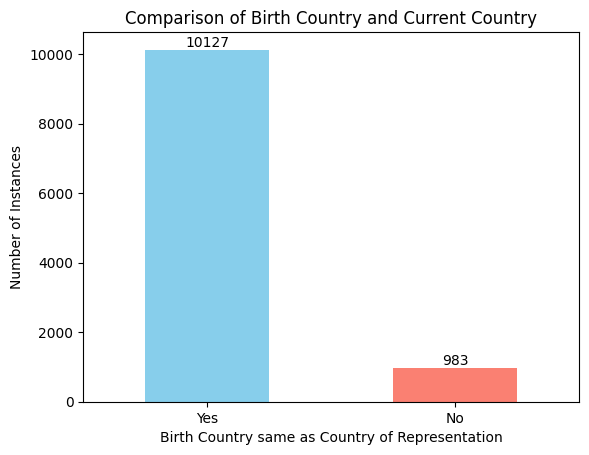

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,birth_country
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11105,4982175,JOSEPH Elijah,JOSEPH E,Elijah JOSEPH,Male,Athlete,TTO,Trinidad and Tobago,Trinidad and Tobago,Trinidad and Tobago,TTO,177,0.0,['Athletics'],"[""Men's 4 x 400m Relay""]",2001-07-03,Trinidad and Tobago
11106,4982762,HOMAN Khrystyna,HOMAN K,Khrystyna HOMAN,Female,Athlete,UKR,Ukraine,Ukraine,Ukraine,UKR,0,0.0,['Judo'],['Women +78 kg'],1999-01-31,Ukraine
11107,4983537,CHELANGAT Annet Chemengich,CHELANGAT AC,Annet Chemengich CHELANGAT,Female,Athlete,UGA,Uganda,Uganda,Uganda,UGA,174,0.0,['Athletics'],"[""Women's 10,000m""]",1993-07-29,Uganda
11108,4986655,ADA ETO Sefora,ADA ETO S,Sefora ADA ETO,Female,Athlete,GEQ,Equatorial Guinea,Equatorial Guinea,Equatorial Guinea,GEQ,165,0.0,['Athletics'],"[""Women's 100m""]",2003-06-11,Equatorial Guinea


In [11]:
# Create a new column to check if 'birth_country' is equal to 'country'
data['same_country'] = data['birth_country'] == data['country']

country_comparison = data['same_country'].value_counts()

ax = country_comparison.plot(kind='bar', color=['skyblue', 'salmon'])


for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Birth Country same as Country of Representation')
plt.ylabel('Number of Instances')
plt.title('Comparison of Birth Country and Current Country')

plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.show()


data.drop(['same_country'], axis = 1)


In [12]:
# We have 3 columns that give the name of the athlete, I will be dropping 2 of the three columns
data = data.drop(['name_short', 'name_tv'], axis = 1)
data.head()

,code,name,gender,function,country_code,country,country_long,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,birth_country,same_country
0,1532872,ALEKSANYAN Artur,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia,True
1,1532873,AMOYAN Malkhas,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia,True
2,1532874,GALSTYAN Slavik,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia,True
3,1532944,HARUTYUNYAN Arsen,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia,True
4,1532945,TEVANYAN Vazgen,Male,Athlete,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia,True


In [13]:
# Checking for duplicates
data.duplicated().sum() # -> We see that we don't have any duplicate values

0

In [14]:
data['function'].value_counts()

function
Athlete              10921
Alternate Athlete      189
Name: count, dtype: int64

In [15]:
# Since most of the members are Atheles, we don't need this column
data = data.drop(['function'], axis = 1)
data.head()

,code,name,gender,country_code,country,country_long,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,birth_country,same_country
0,1532872,ALEKSANYAN Artur,Male,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia,True
1,1532873,AMOYAN Malkhas,Male,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia,True
2,1532874,GALSTYAN Slavik,Male,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia,True
3,1532944,HARUTYUNYAN Arsen,Male,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia,True
4,1532945,TEVANYAN Vazgen,Male,ARM,Armenia,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia,True


In [16]:
# We look at the distribution of the Gender in athletes
data['gender'].value_counts()

gender
Male      5655
Female    5455
Name: count, dtype: int64

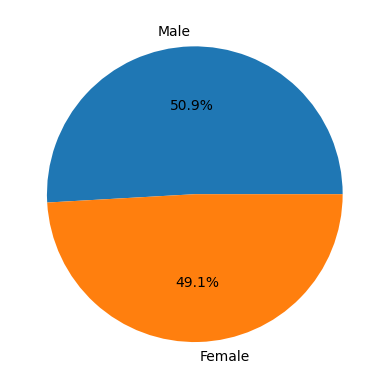

In [17]:
x = data['gender'].value_counts()
label = data['gender'].unique()
plt.pie(x, labels = label, autopct='%1.1f%%')
plt.show()
# The distribution of male and female athletes is very balanced with males just 1.8% greater than females

In [18]:
# Similar to the name columns, we have 3 different columns for country, hence we will only be keeping one of the columns
data = data.drop(['country_code', 'country_long'], axis = 1)
data.head()

,code,name,gender,country,nationality_full,nationality_code,height,weight,disciplines,events,birth_date,birth_country,same_country
0,1532872,ALEKSANYAN Artur,Male,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia,True
1,1532873,AMOYAN Malkhas,Male,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia,True
2,1532874,GALSTYAN Slavik,Male,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia,True
3,1532944,HARUTYUNYAN Arsen,Male,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia,True
4,1532945,TEVANYAN Vazgen,Male,Armenia,Armenia,ARM,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia,True


In [19]:
data = data.drop(['nationality_full', 'nationality_code'], axis = 1)
data.head()

,code,name,gender,country,height,weight,disciplines,events,birth_date,birth_country,same_country
0,1532872,ALEKSANYAN Artur,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia,True
1,1532873,AMOYAN Malkhas,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia,True
2,1532874,GALSTYAN Slavik,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia,True
3,1532944,HARUTYUNYAN Arsen,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia,True
4,1532945,TEVANYAN Vazgen,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia,True


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   code           11110 non-null  int64  
 1   name           11110 non-null  object 
 2   gender         11110 non-null  object 
 3   country        11110 non-null  object 
 4   height         11110 non-null  int64  
 5   weight         11108 non-null  float64
 6   disciplines    11110 non-null  object 
 7   events         11110 non-null  object 
 8   birth_date     11110 non-null  object 
 9   birth_country  11110 non-null  object 
 10  same_country   11110 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 878.9+ KB


In [21]:
data.shape

(11110, 11)

In [22]:
data['birth_date'] = pd.to_datetime(data['birth_date'])

# Reference date for age calculation -> this is the starting date of the olympics
reference_date = pd.to_datetime('2024-08-12')

# Calculate age
data['age'] = (reference_date.year - data['birth_date'].dt.year) - (
    (reference_date.month < data['birth_date'].dt.month) | 
    ((reference_date.month == data['birth_date'].dt.month) & (reference_date.day < data['birth_date'].dt.day))
)

data.head()

,code,name,gender,country,height,weight,disciplines,events,birth_date,birth_country,same_country,age
0,1532872,ALEKSANYAN Artur,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia,True,32
1,1532873,AMOYAN Malkhas,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia,True,25
2,1532874,GALSTYAN Slavik,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia,True,27
3,1532944,HARUTYUNYAN Arsen,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia,True,24
4,1532945,TEVANYAN Vazgen,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia,True,24


In [23]:
# Now I will add a new column to the dataset, which is going to be the Continents column
# Mapping countries to continents (I have also added None to Asia, as there were only 38 such rows)
continent_mapping = {
    'Asia': ['Armenia', 'Iraq', 'UA Emirates', 'IR Iran', 'Singapore', 'Malaysia',
             'India', 'Israel', 'Bahrain', 'Uzbekistan', 'Kazakhstan', 'Oman',
             'Jordan', 'Cyprus', 'Lebanon', 'Qatar', 'Saudi Arabia', 'Türkiye',
             'Palestine', 'Sri Lanka', 'Myanmar', 'Vietnam', 'Thailand',
             'Indonesia', 'Japan', 'Yemen', 'Bhutan', 'Bangladesh', 'Afghanistan',
             'Turkmenistan', 'Maldives', 'Pakistan', 'China', 'Kyrgyzstan',
             'Korea', 'Azerbaijan', 'Brunei Darussalam', 'Hong Kong, China', 'Nepal',
             'Tajikistan', 'Timor-Leste', 'Syria', 'Philippines', 'DPR Korea',
             'Georgia', 'Kuwait', 'Mongolia', 'Lao PDR', 'Cambodia', None],  # Includes the NaN value as well
    'Africa': ['Gambia', 'Comoros', 'Djibouti', 'Malawi', 'Mauritania', 'Gabon',
               'Ethiopia', 'Congo', 'Ghana', 'Libya', 'Algeria', 'Morocco',
               'Sao Tome & Principe', 'Lesotho', 'Eswatini', 'Mozambique',
               'Mali', 'Namibia', 'Uganda', 'Eritrea', 'Mauritius', 'Burkina Faso',
               'Seychelles', 'Niger', 'Chad', 'Senegal', 'Nigeria', 'Egypt',
               'Cabo Verde', 'Guinea-Bissau', 'Benin', 'Zimbabwe', 'Guinea',
               'Sudan', 'South Africa', 'Kenya', 'Rwanda', 'Angola', 'Tanzania',
               'Côte d\'Ivoire', 'Zambia', 'Cameroon', 'DR Congo', 'Burundi',
               'Madagascar', 'Centr Afric Re', 'Equatorial Guinea', 'Tunisia',
               'Somalia', 'Liberia', 'Sierra Leone', 'Togo', 'Botswana', 'South Sudan'],
    'North America': ['United States', 'Mexico', 'Canada', 'Costa Rica', 'Belize',
                      'Cuba', 'Saint Lucia', 'Grenada', 'Barbados', 'Dominica',
                      'Bahamas', 'Trinidad and Tobago', 'Jamaica', 'Haiti',
                      'St Kitts and Nevis', 'StVincent&Grenadines', 'Antigua and Barbuda',
                      'Dominican Republic', 'Honduras', 'El Salvador', 'Panama',
                      'Nicaragua', 'Guatemala', 'Puerto Rico', 'Virgin Islands, US', 
                      'Cayman Islands', 'Bermuda', 'Aruba', 'Virgin Islands, B'],
    'South America': ['Colombia', 'Argentina', 'Guyana', 'Suriname', 'Paraguay',
                      'Chile', 'Brazil', 'Bolivia', 'Peru', 'Ecuador', 'Uruguay',
                      'Venezuela'],
    'Europe': ['Armenia', 'Romania', 'Luxembourg', 'Ireland', 'Netherlands',
               'Croatia', 'France', 'Germany', 'Sweden', 'Ukraine', 'Italy',
               'Spain', 'Kosovo', 'Albania', 'Bulgaria', 'Monaco', 'Liechtenstein',
               'Austria', 'Poland', 'Czechia', 'Switzerland', 'Hungary',
               'Montenegro', 'Andorra', 'Slovakia', 'Estonia', 'Lithuania', 'Portugal',
               'Iceland', 'Latvia', 'Serbia', 'Greece', 'North Macedonia', 'Slovenia',
               'Belgium', 'Finland', 'Norway', 'Malta', 'San Marino', 'Great Britain',
               'Georgia', 'Russian Federation', 'Bosnia & Herzegovina'],
    'Oceania': ['Australia', 'New Zealand', 'Vanuatu', 'Kiribati', 'Marshall Islands',
                'Micronesia', 'Palau', 'Solomon Islands', 'Tonga', 'Fiji', 'Nauru',
                'Samoa', 'Tuvalu', 'Papua New Guinea', 'Cook Islands']
}

country = data['country']

continent_map = {country: continent for continent, countries_list in continent_mapping.items() for country in countries_list}

data['Continent'] = data['country'].map(continent_map)

data.head()

,code,name,gender,country,height,weight,disciplines,events,birth_date,birth_country,same_country,age,Continent
0,1532872,ALEKSANYAN Artur,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 97kg""]",1991-10-21,Armenia,True,32,Europe
1,1532873,AMOYAN Malkhas,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 77kg""]",1999-01-22,Armenia,True,25,Europe
2,1532874,GALSTYAN Slavik,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Greco-Roman 67kg""]",1996-12-21,Armenia,True,27,Europe
3,1532944,HARUTYUNYAN Arsen,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 57kg""]",1999-11-22,Armenia,True,24,Europe
4,1532945,TEVANYAN Vazgen,Male,Armenia,0,0.0,['Wrestling'],"[""Men's Freestyle 65kg""]",1999-10-27,Armenia,True,24,Europe


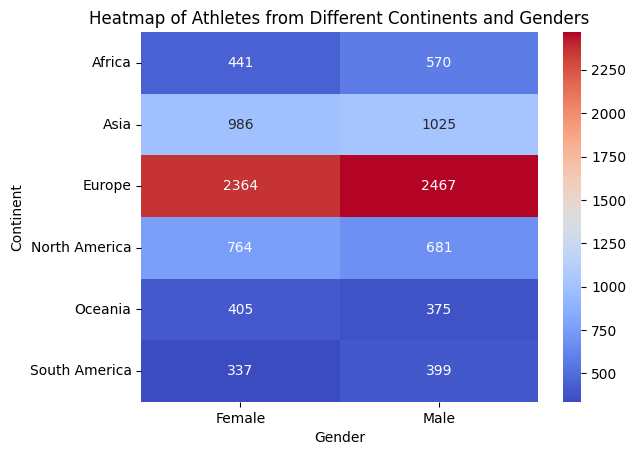

In [24]:
# The heat map shows the distribution of gender of athletes from each continent
import seaborn as sns
import matplotlib.pyplot as plt

continent_gender_analysis = data.groupby(['Continent', 'gender']).size().unstack()

sns.heatmap(continent_gender_analysis, annot=True, cmap='coolwarm', fmt='d')

plt.xlabel('Gender')
plt.ylabel('Continent')
plt.title('Heatmap of Athletes from Different Continents and Genders')

plt.show()


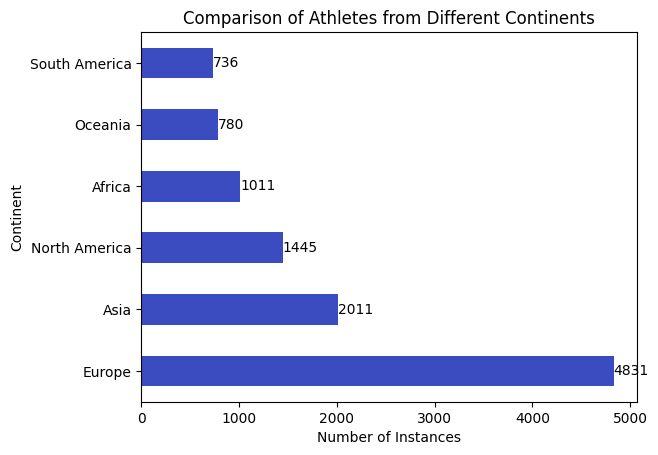

In [25]:
# Number of athletes from each country
import matplotlib.pyplot as plt

continent_analysis = data['Continent'].value_counts()

ax = continent_analysis.plot(kind='barh', cmap='coolwarm')

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f')

plt.xlabel('Number of Instances')
plt.ylabel('Continent')
plt.title('Comparison of Athletes from Different Continents')

plt.show()

Text(0.5, 1.0, 'Top 10 Countries by Number of Athletes')

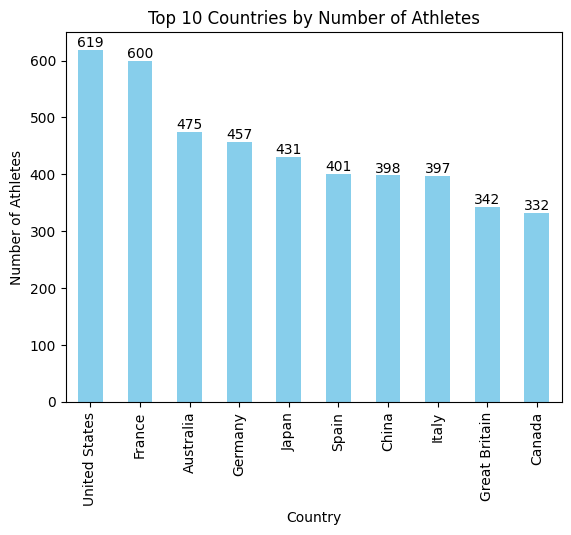

In [26]:
# Bar plot shows the countries with the more number of athletes
country_analysis = data['country'].value_counts()

ax = country_analysis[:10].plot(kind='bar', color='skyblue')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Athletes')
ax.set_title('Top 10 Countries by Number of Athletes')

Text(0.5, 1.0, 'Least 10 Countries by Number of Athletes')

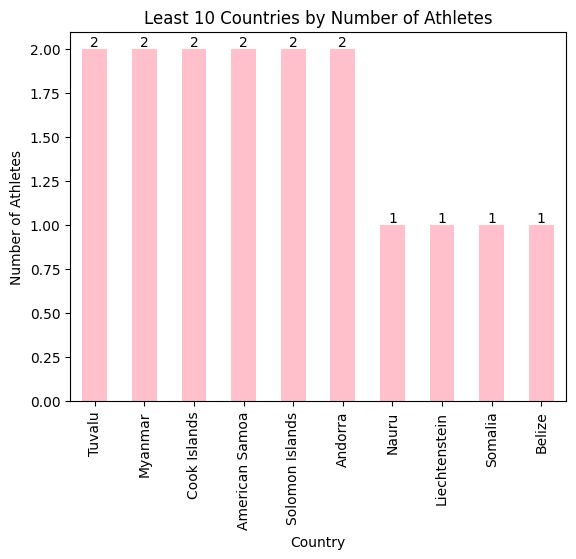

In [27]:
# Similar to above graph, this graph shows the countries with the least athlete representations
ax = country_analysis[-10:].plot(kind='bar', color='pink')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

ax.set_xlabel('Country')
ax.set_ylabel('Number of Athletes')
ax.set_title('Least 10 Countries by Number of Athletes')

In [28]:
# Getting the data of column 'Discipline in the correct format'
data['disciplines'] = data['disciplines'].apply(lambda x: x.strip("[]'\""))
data['disciplines'].unique()

array(['Wrestling', 'Athletics', 'Judo', 'Triathlon', 'Swimming',
       'Artistic Swimming', 'Weightlifting', 'Canoe Slalom', 'Boxing',
       'Sailing', 'Rowing', 'Artistic Gymnastics', 'Diving', 'Equestrian',
       'Rhythmic Gymnastics', 'Modern Pentathlon', 'Taekwondo', 'Surfing',
       'Cycling Road', 'Archery', 'Shooting', 'Canoe Sprint', 'Football',
       'Marathon Swimming', 'Sport Climbing', 'Table Tennis', 'Golf',
       'Badminton', 'Hockey', 'Cycling BMX Racing', 'Fencing',
       'Rugby Sevens', "Marathon Swimming', 'Swimming", 'Cycling Track',
       'Handball', 'Skateboarding', 'Cycling Mountain Bike', 'Tennis',
       'Breaking', 'Trampoline Gymnastics', 'Cycling BMX Freestyle',
       'Beach Volleyball', 'Basketball', 'Water Polo',
       "Cycling Road', 'Cycling Track", 'Volleyball', '3x3 Basketball',
       "Cycling Road', 'Cycling Mountain Bike",
       "Cycling Road', 'Triathlon", "3x3 Basketball', 'Basketball"],
      dtype=object)

In [29]:
# Replacing the values where ever required
replacements = {
    "3x3 Basketball', 'Basketball": '3x3 Basketball',
    "Cycling Road', 'Cycling Track": 'Cycling Road',
    "Cycling Road', 'Cycling Mountain Bike": 'Cycling Road',
    "Cycling Road', 'Triathlon": 'Cycling Road',
    "Cycling Track": 'Cycling Road',
    "Cycling Mountain Bike": 'Cycling Road',
    "Cycling BMX Racing": 'Cycling Road',
    "Cycling BMX Freestyle": 'Cycling Road',
    "Marathon Swimming', 'Swimming": 'Marathon Swimming'
}

data['disciplines'] = data['disciplines'].replace(replacements)

data['disciplines'].unique()

array(['Wrestling', 'Athletics', 'Judo', 'Triathlon', 'Swimming',
       'Artistic Swimming', 'Weightlifting', 'Canoe Slalom', 'Boxing',
       'Sailing', 'Rowing', 'Artistic Gymnastics', 'Diving', 'Equestrian',
       'Rhythmic Gymnastics', 'Modern Pentathlon', 'Taekwondo', 'Surfing',
       'Cycling Road', 'Archery', 'Shooting', 'Canoe Sprint', 'Football',
       'Marathon Swimming', 'Sport Climbing', 'Table Tennis', 'Golf',
       'Badminton', 'Hockey', 'Fencing', 'Rugby Sevens', 'Handball',
       'Skateboarding', 'Tennis', 'Breaking', 'Trampoline Gymnastics',
       'Beach Volleyball', 'Basketball', 'Water Polo', 'Volleyball',
       '3x3 Basketball'], dtype=object)

In [30]:
data[data['disciplines'] == 'Breaking']

,code,name,gender,country,height,weight,disciplines,events,birth_date,birth_country,same_country,age,Continent
542,1542901,BILLY,Male,Morocco,0,0.0,Breaking,['B-Boys'],2003-11-24,Morocco,True,20,Africa
543,1542909,ELMAMOUNY,Female,Morocco,0,0.0,Breaking,['B-Girls'],1999-07-20,Morocco,True,25,Africa
1604,1563335,QUAKE,Male,Chinese Taipei,0,0.0,Breaking,['B-Boys'],1999-09-21,Chinese Taipei,True,24,NaN
1933,1568048,HONGTEN,Male,Korea,0,0.0,Breaking,['B-Boys'],1984-12-27,Korea,True,39,Asia
2640,1880191,DANY DANN,Male,France,0,0.0,Breaking,['B-Boys'],1988-05-03,France,True,36,Europe
2641,1880193,LAGAET,Male,France,0,0.0,Breaking,['B-Boys'],1988-05-28,France,True,36,Europe
2642,1880195,SYSSY,Female,France,0,0.0,Breaking,['B-Girls'],2007-09-01,France,True,16,Europe
2643,1880196,CARLOTA,Female,France,0,0.0,Breaking,['B-Girls'],2002-05-11,France,True,22,Europe
3699,1897536,KUZYA,Male,Ukraine,0,0.0,Breaking,['B-Boys'],1990-07-23,Russian Federation,False,34,Europe
3700,1897537,KATE,Female,Ukraine,0,0.0,Breaking,['B-Girls'],1995-06-02,Ukraine,True,29,Europe


In [31]:
data['disciplines'].value_counts()

disciplines
Athletics                2018
Swimming                  836
Cycling Road              571
Football                  553
Rowing                    493
Hockey                    415
Handball                  386
Judo                      378
Shooting                  342
Sailing                   330
Rugby Sevens              317
Volleyball                311
Wrestling                 291
Basketball                287
Water Polo                286
Fencing                   260
Boxing                    248
Equestrian                242
Canoe Sprint              239
Artistic Gymnastics       190
Tennis                    176
Table Tennis              175
Badminton                 175
Diving                    135
Taekwondo                 134
Archery                   128
Weightlifting             122
Golf                      120
Triathlon                 111
Artistic Swimming         106
Beach Volleyball           96
Rhythmic Gymnastics        94
Skateboarding              8

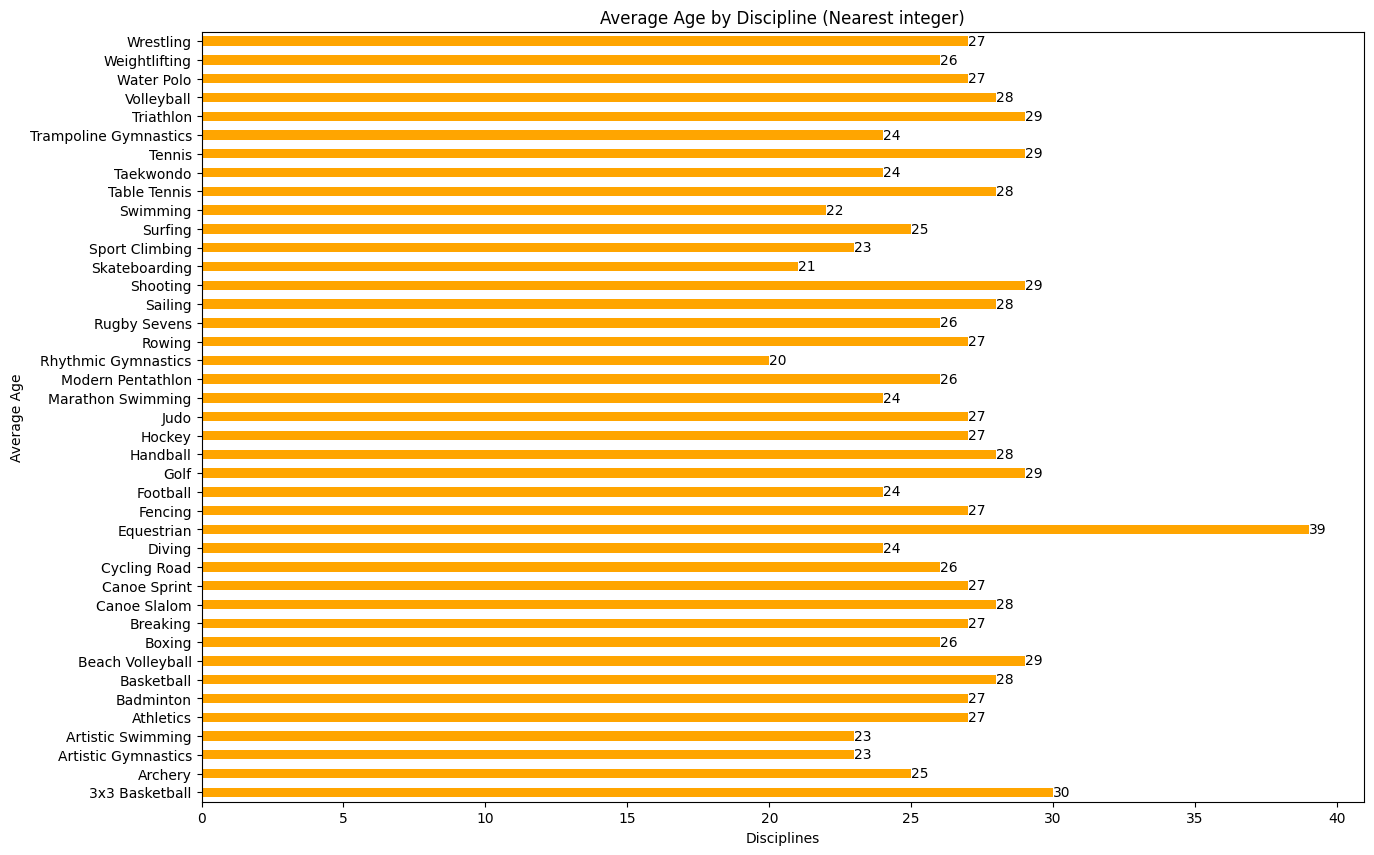

In [32]:
# We are making a bar plot of the average age of each discipline
plt.figure(figsize=(15, 10))

ax = data.groupby('disciplines')['age'].mean().round().plot(kind='barh', color='orange')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.xlabel('Disciplines')
plt.ylabel('Average Age')
plt.title('Average Age by Discipline (Nearest integer)')

plt.show()